<a href="https://colab.research.google.com/github/ccai-course/Module2-Mitigation/blob/main/ShowSolarArrayLocations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  !pip install geopandas

     |████████████████████████████████| 994 kB 5.4 MB/s 
     |████████████████████████████████| 6.6 MB 37.8 MB/s 
     |████████████████████████████████| 15.4 MB 33 kB/s 


In [2]:
# Read in solar image

# Import library functions to download and read images
import requests
from io import BytesIO

# Dataset: Distributed Solar Photovoltaic Array Location and Extent Data Set for Remote Sensing Object Identification
# California Aerial Imagery SolarArrayPolygons.geojson

url = 'https://ndownloader.figshare.com/files/24115691'

downloader_response = requests.get(url)
byte_stream = BytesIO(downloader_response.content)

# Import geopandas library for geospatial data
import geopandas as gpd

solar_array_polygons_df = gpd.read_file(byte_stream)
solar_array_polygons_df.head()

,polygon_id,centroid_latitude,centroid_longitude,centroid_latitude_pixels,centroid_longitude_pixels,city,area_pixels,area_meters,image_name,nw_corner_of_image_latitude,nw_corner_of_image_longitude,se_corner_of_image_latitude,se_corner_of_image_longitude,datum,projection_zone,resolution,jaccard_index,polygon_vertices_pixels,geometry
0,1,36.926310,-119.840555,107.618458,3286.151487,Fresno,1513.254134,136.192872,11ska460890,36.926336,-119.851622,36.913233,-119.8343,NAD83,11,0.3,0.914020,"[ [ 3360.4950690000001, 131.63116400000001 ], ...","POLYGON ((-119.84030 36.92625, -119.84068 36.9..."
1,2,36.926477,-119.840561,45.977659,3286.352946,Fresno,1727.907934,155.511714,11ska460890,36.926336,-119.851622,36.913233,-119.8343,NAD83,11,0.3,0.829071,"[ [ 3361.1538460000002, 69.615385000000003 ], ...","POLYGON ((-119.84031 36.92642, -119.84080 36.9..."
2,3,36.926542,-119.840506,22.280851,3303.465657,Fresno,1242.184349,111.796591,11ska460890,36.926336,-119.851622,36.913233,-119.8343,NAD83,11,0.3,0.937961,"[ [ 3358.0157260000001, 48.136862999999998 ], ...","POLYGON ((-119.84032 36.92648, -119.84032 36.9..."
3,4,36.921008,-119.842847,2048.362567,2547.366116,Fresno,688.933420,62.004008,11ska460890,36.926336,-119.851622,36.913233,-119.8343,NAD83,11,0.3,0.842634,"[ [ 2571.5917159999999, 2068.0493099999999 ], ...","POLYGON ((-119.84276 36.92096, -119.84277 36.9..."
4,5,36.920976,-119.842906,2060.014890,2529.504997,Fresno,1060.890554,95.480150,11ska460890,36.926336,-119.851622,36.913233,-119.8343,NAD83,11,0.3,0.890998,"[ [ 2563.7810650000001, 2091.3984220000002 ], ...","POLYGON ((-119.84279 36.92089, -119.84299 36.9..."


In [ ]:
solar_array_polygons_df[solar_array_polygons_df['city'] == 'Oxnard']

,polygon_id,centroid_latitude,centroid_longitude,centroid_latitude_pixels,centroid_longitude_pixels,city,area_pixels,area_meters,image_name,nw_corner_of_image_latitude,nw_corner_of_image_longitude,se_corner_of_image_latitude,se_corner_of_image_longitude,datum,projection_zone,resolution,jaccard_index,polygon_vertices_pixels,geometry
15292,15417,34.243116,-119.160561,2118.488363,3428.374855,Oxnard,1000.231156,90.020804,621051913,34.248828,-119.171986,34.238028,-119.151981,NAD83,0405,0.3,0.000000,"[ [ 3431.086221, 2143.6813189999998 ], [ 3414....","POLYGON ((-119.16055 34.24305, -119.16061 34.2..."
15293,15418,34.241134,-119.165246,2823.293951,2004.022414,Oxnard,123.531876,11.117869,621051913,34.248828,-119.171986,34.238028,-119.151981,NAD83,0405,0.3,0.796921,"[ [ 1999.661775, 2832.6103659999999 ], [ 2013....","POLYGON ((-119.16526 34.24111, -119.16522 34.2..."
15294,15419,34.239517,-119.169736,3395.750380,640.194779,Oxnard,101.415315,9.127378,621051913,34.248828,-119.171986,34.238028,-119.151981,NAD83,0405,0.3,0.791697,"[ [ 647.94408899999996, 3395.371936 ], [ 637.5...","POLYGON ((-119.16971 34.23952, -119.16975 34.2..."
15295,15420,34.239478,-119.169633,3410.340968,671.224025,Oxnard,228.420819,20.557874,621051913,34.248828,-119.171986,34.238028,-119.151981,NAD83,0405,0.3,0.836574,"[ [ 681.71114599999999, 3405.5790360000001 ], ...","POLYGON ((-119.16960 34.23949, -119.16963 34.2..."
15296,15421,34.240318,-119.164931,3121.117334,2095.824496,Oxnard,114.327411,10.289467,621051913,34.248828,-119.171986,34.238028,-119.151981,NAD83,0405,0.3,0.856176,"[ [ 2103.9326970000002, 3116.8940950000001 ], ...","POLYGON ((-119.16490 34.24033, -119.16491 34.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16882,17176,34.256914,-119.241738,804.042153,2958.454389,Oxnard,261.576288,23.541866,618651917,34.259022,-119.251561,34.248236,-119.231544,NAD83,0405,0.3,0.901662,"[ [ 2979.1346149999999, 808.55769199999997 ], ...","POLYGON ((-119.24167 34.25690, -119.24180 34.2..."
16883,17177,34.256888,-119.241750,813.324927,2954.720753,Oxnard,261.700856,23.553077,618651917,34.259022,-119.251561,34.248236,-119.231544,NAD83,0405,0.3,0.739167,"[ [ 2972.3348430000001, 822.62504999999999 ], ...","POLYGON ((-119.24169 34.25686, -119.24169 34.2..."
16884,17178,34.256862,-119.241763,823.026658,2950.873002,Oxnard,259.236259,23.331263,618651917,34.259022,-119.251561,34.248236,-119.231544,NAD83,0405,0.3,0.906757,"[ [ 2971.4423080000001, 828.17307700000003 ], ...","POLYGON ((-119.24169 34.25685, -119.24172 34.2..."
16885,17179,34.256836,-119.241773,832.358761,2947.669943,Oxnard,266.269116,23.964220,618651917,34.259022,-119.251561,34.248236,-119.231544,NAD83,0405,0.3,0.810434,"[ [ 2967.788462, 837.98076900000001 ], [ 2966....","POLYGON ((-119.24171 34.25682, -119.24171 34.2..."


In [3]:
# Read in solar image

# Import library functions to download and read images
import requests
from io import BytesIO
from skimage import io

# A Oxnard 621051913 Aerial Tile
tile_url = 'https://ndownloader.figshare.com/files/5287822'

downloader_response = requests.get(tile_url)
img = io.imread(BytesIO(downloader_response.content))

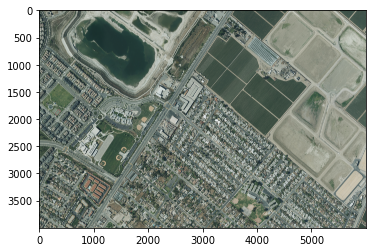

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(img)

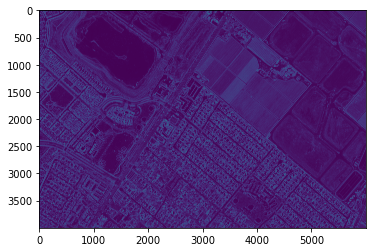

In [8]:
from skimage import filters
plt.figure()
plt.imshow(filters.sobel(img[:,:,0]))

In [32]:
polygons_px = solar_array_polygons_df[solar_array_polygons_df['city'] == 'Oxnard'][solar_array_polygons_df['image_name'] == '621051913']['polygon_vertices_pixels']

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1299: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


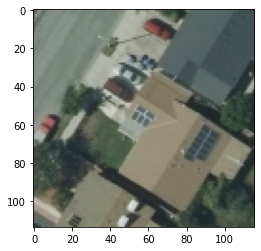

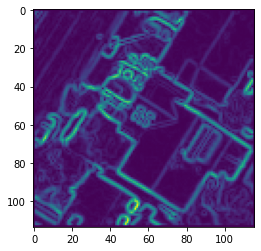

In [73]:
import numpy as np

# show one polygon with solar array inside
n=2
polygon_vertices = [np.array(eval(a)) for a in polygons_px]
top_left, bottom_right = (int(min(polygon_vertices[n][:,1])), int(min(polygon_vertices[n][:,0]))), (int(max(polygon_vertices[n][:,1]))+1, int(max(polygon_vertices[n][:,0]))+1)

plt.figure()
plt.imshow(img[top_left[0]-50:bottom_right[0]+50,top_left[1]-50:bottom_right[1]+50,:])

plt.figure()
plt.imshow(filters.sobel(img[top_left[0]-50:bottom_right[0]+50,top_left[1]-50:bottom_right[1]+50,0]))

In [61]:
top_left, bottom_right

((3406.572274, 2093.174134), (3450.528318, 2143.681319))